In [1]:
import numpy as np
import h5py,glob,os
from pycbc import conversions

from tqdm import tqdm 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean+0.5     # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 22,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : False,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde

In [2]:
import seaborn as sns

In [3]:
from pycbc.inference import io,models

In [4]:
fn = '/work/jahed.abedi/Ringdown/injections/inj5/all_modes/margpol-highpass-inj100/inj5/samples-220_330_210_320-M18.hdf'

In [5]:
fp = io.loadfile(fn, 'r')

In [6]:
fp['samples'].keys()

<KeysViewHDF5 ['amp210', 'amp320', 'amp330', 'final_mass', 'final_spin', 'inclination', 'logamp220', 'loglikelihood', 'logwt', 'phi210', 'phi220', 'phi320', 'phi330']>

In [7]:
a = fp.read_samples(['amp320'])

In [8]:
a

rec.array([(-15.7128629 , 0.42190014), (-17.57799581, 0.1873368 ),
           (-16.10394747, 0.2397927 ), ..., (-14.78794635, 0.2631922 ),
           (-16.65909536, 0.2024452 ), (-17.71268073, 0.26100012)],
          dtype=[('loglikelihood', '<f8'), ('amp320', '<f8')])

<AxesSubplot:ylabel='Density'>

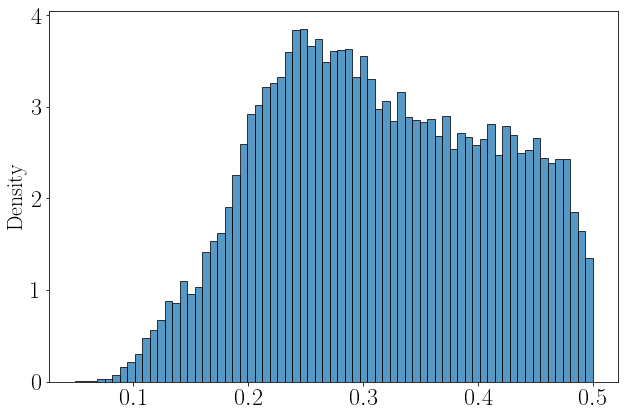

In [9]:
sns.histplot(a['amp320'],stat='density')

# 190521

In [10]:
gw190521path = '/work/jahed.abedi/Ringdown/GW190521/margpol-highpass-run/all_modes_run/samples-220_330-06.hdf'
f190521 = io.loadfile(gw190521path,'r')
a190521 = f190521.read_samples(['amp330'])

<AxesSubplot:ylabel='Density'>

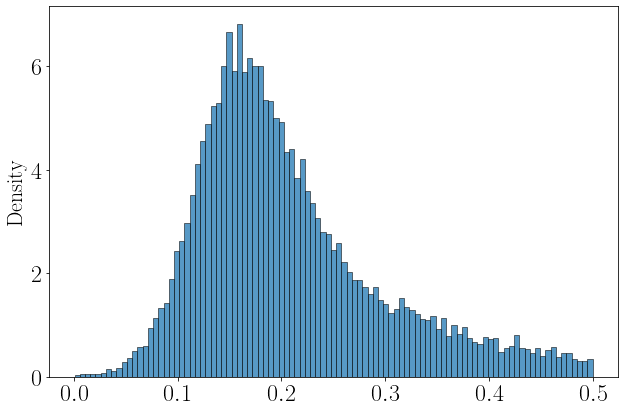

In [11]:
sns.histplot(a190521['amp330'],stat='density')

# 

In [14]:
density = bounded_1d_kde(a190521['amp330'], xlow=0., xhigh=0.5, method="Reflection")

In [16]:
density(0)

array([0.04122708])

In [17]:
2/density(0)

array([48.51180278])